<a href="https://colab.research.google.com/github/kimanuul/python_lectures/blob/main/day0704.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "확률적 경사 하강법"
date: '2022-07-04'
---

## 확률적 경사 하강법
- 점진적 학습(step, 보폭
- 학습률
- XGBoost, LightGBM, 딥러닝(이미지 분류, 자연어 처리, 옵티마이저)

###
- 신경망 이미지 데이터, 자연어
- 자율주행 하루 데이터 1TB --> 학습
- 한꺼번에 다 모델을 학습 어려움
  + 샘플링, 배치, 에포크, 오차(=손실, loss)가 가장 적은 지점을 찾아야 함
- 결론적으로 확률적 경사 하강법

## 손실함수
- 로지스틱 손실 함수
-

In [57]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


- 입력 데이터와 타깃 데이터 분

In [58]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

fish_input.shape, fish_target.shape

((159, 5), (159,))

- 훈련 세트와 테스트 데이터 분리

In [59]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    # input, target, 옵션...
    fish_input, fish_target, random_state = 42
)

- 훈련 세트와 테스트 세트의 특성 표준화
  + 무게, 길이, 대각선 길이, 높이, 너비
- 표준화 처리 진

In [60]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

## 모델링
- 확률적 경사 하강법

In [61]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 10, random_state = 42)

sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


- partial_fit() 메서드 사용하면 추가 학습

In [62]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합
- 에포크 숫자가 적으면 -> 덜 학습
- early_stopping
  + 에포크 숫자를 1000, 손실 10, 9, 8, , 3
  + 3에 도달한 시점이 150
-

In [63]:
import numpy as np 
sc = SGDClassifier(loss='log', random_state = 42)
train_score = []
test_score = []

classes = np.unique(train_target)

# 300번 에포크 훈련을 반복
# 훈련 할 때마다, train_score, test_score 추가를 한다. 
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target)) 
  

-시각화

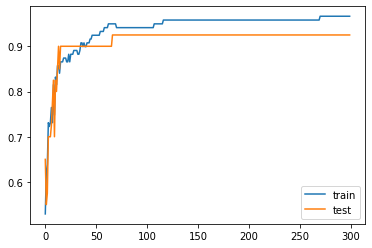

In [64]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.legend(["train", "test"])
plt.show()

## 결정트리
- wine 데이터 가져오기

In [65]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

print(wine.head())

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0


- 데이터 가공하기

In [66]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

- 훈련데이터 분리

In [67]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state = 42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((5197, 3), (1300, 3), (5197,), (1300,))

- 표준화 처리

In [68]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

- 훈련 정확도는 99.6%
- 테스트 정확도는 85.9%
--> 과대적합이 일어남

- 로지스틱 회귀 모델

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [70]:
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


- 모델 만들기

0.89532422551472
0.8569230769230769


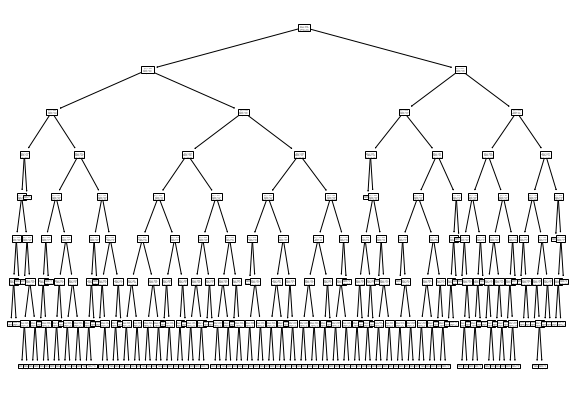

In [71]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

## 노드란 무엇인가?
- 0 이면 레드 와인
- 1 이면 화이트 와인

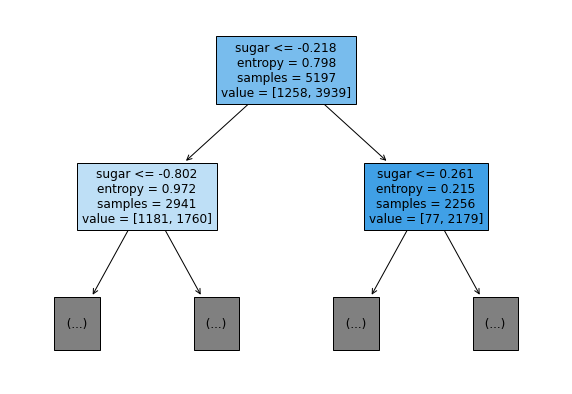

In [72]:
plt.figure(figsize = (10, 7))
plot_tree(dt,
          max_depth = 1,
          filled = True,
          feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

- 불순도
    + 한 범주 안에서 서로 다른 데이터가 얼마나 섞여 있는지 나타냄

- 불순도 gini 수치
  + 비율
  + 레드와인 5 : 화이트 와인 5  = 0.5

- 엔트로피(Entropy)
  + 불확실한 정도를 의미함 (0~1 사이)
  + 흰색과 검은색이 각각 50개 섞여있다.
    + 흰색 노드 엔트로피 최소 - 0
    + 검은색 노드 엔트로피 최소 - 0



### 특성 중요도
- 어떤 특성이 결정 트리 모델에 영향을 주었는가?

In [73]:
print(dt.feature_importances_)

[0.15533444 0.6675247  0.17714086]


## 현업에서의 적용
- 현업에서 DecisionTreeClassifier
- 랜덤포레스트, XGBoost 하이퍼파라미터


## 검증 세트
- 훈련세트와 테스트세트
- 훈련 : 교과서 공부하는 것 훈련세트, 모의평가
- 검증 : 강남대성 모의고사 문제지
- 테스트 : 6월 / 9월
- 실전 : 수능

In [74]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

print(wine.head())


data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

# 훈련 80%
# 테스트 20%
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size = 0.2, random_state = 42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape


   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0


((5197, 3), (1300, 3), (5197,), (1300,))

In [75]:
# 훈련 80%
# 검증 20%

sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size = 0.2, random_state = 42
)

sub_input.shape, val_input.shape, sub_target.shape, val_target.shape

((4157, 3), (1040, 3), (4157,), (1040,))

- 훈련데이터 : sub_input, sub_target
- 검증데이터 : val_input, val_target
- 테스트데이터 : test_input, test_target

- 모형 만들기

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input, sub_target)
print("훈련 성과 : ", dt.score(sub_input, sub_target))
print("검증 성과 : ", dt.score(val_input, val_target))
print("마지막 최종 : ", dt.score(test_input, test_target))

훈련 성과 :  0.9971133028626413
검증 성과 :  0.864423076923077
마지막 최종 :  0.8569230769230769


- 훈련 : 99% (과대적합)
- 검증 : 86%
---
- 최종 : 85%


### 교차 검증
- 데이터 셋을 반복 분할
- For loop
- 편향적인 샘플링을 방지하기 위해
- 교차검증 한다 해서 정확도가 무조건 올라간다? (x)
- 모형을 안정적으로 만들어 준다
  + 과대적합 방지

In [77]:
import numpy as np
from sklearn.model_selection import KFold

df = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 데이터를 K 폴드로 나눈다
folds = KFold(n_splits = 5, shuffle = True)
for train_idx, valid_idx in folds.split(df):
  print(f'훈련데이터 : {df[train_idx]}, 검증데이터 : {df[valid_idx]}')

훈련데이터 : [ 1  2  5  6  7  8  9 10], 검증데이터 : [3 4]
훈련데이터 : [ 1  3  4  5  7  8  9 10], 검증데이터 : [2 6]
훈련데이터 : [1 2 3 4 5 6 7 8], 검증데이터 : [ 9 10]
훈련데이터 : [ 1  2  3  4  5  6  9 10], 검증데이터 : [7 8]
훈련데이터 : [ 2  3  4  6  7  8  9 10], 검증데이터 : [1 5]


- 교차 검증 함수

In [78]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)
print("평균 : ", np.mean(scores['test_score']))

{'fit_time': array([0.00856519, 0.00699925, 0.00773931, 0.00728726, 0.00691032]), 'score_time': array([0.00073147, 0.00065422, 0.00068235, 0.00068927, 0.00064707]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
평균 :  0.855300214703487


- StratifiedKFold 사용

In [79]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)
print("평균 : ", np.mean(scores['test_score']))

{'fit_time': array([0.00971413, 0.00710511, 0.00734305, 0.00743556, 0.00686908]), 'score_time': array([0.00079894, 0.00071692, 0.00080347, 0.00065923, 0.00062037]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}
평균 :  0.855300214703487


In [80]:
from sklearn.model_selection import StratifiedKFold
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(dt, train_input, train_target, cv = splitter)
print(scores)
print("평균 : ", np.mean(scores['test_score']))

{'fit_time': array([0.01107836, 0.00849605, 0.00829625, 0.00798273, 0.00783992,
       0.00794697, 0.00931644, 0.0090518 , 0.00789452, 0.00777817]), 'score_time': array([0.00063372, 0.00058699, 0.00054407, 0.00053525, 0.00053144,
       0.00053644, 0.0019145 , 0.00052881, 0.00053692, 0.00055456]), 'test_score': array([0.83461538, 0.87884615, 0.85384615, 0.85384615, 0.84615385,
       0.87307692, 0.85961538, 0.85549133, 0.85163776, 0.86705202])}
평균 :  0.8574181117533719


## 하이퍼파라미터 튜닝
-  그리드 서치
  + 사람이 수동으로 입력
  + max_depth : [1, 3, 7]
- 랜덤 서치
  + 사람이 범위만 지정
  + max_depth : 1~10 / by random
- 사람의 개입 없이 하이퍼파라미터 튜닝을 자동으로 수행하는 기술을 AutoML이라고 함
  + 예) PyCaret
- 각 모델마다 적게는 1-2개에서 많게는 5-6개의 매개변수를 제공한다.
  + XGBoost -> 수백개
- 하이퍼파라미터와 동시에 교차검증을 수행

교차검증 5번
교차검증 1번 돌 때, Max Depth 3번 적용
- 총 결과값 3*5*2 = 30

- Max Depth = 1, 3, 7
- Criterion = gini, entropy


In [81]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1, 3, 7],
    'min_impurity_decrease' : [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
}

gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs = -1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 7],
                         'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [82]:
print("best :" , gs.best_estimator_)
dt = gs.best_estimator_

best : DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.0005,
                       random_state=42)
